### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Vision Zero road safety survey analysis

This notebook looks at responses to a survey about road safety. The ultimate objective of the data anaysis is to improve driver, pedestrian, and bicyclist transportation safety. What can we extract from the comments left by the respondents that can help us better understand the current sentiment towards road safety? Could we perhaps find any strong indication where improvements need to be made?

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Import the data set.
survey_data = pd.read_csv('../Data/Vision_Zero_Safety.csv')

# View the data.
survey_data.shape

(5591, 11)

# 1. Pre-process the data

### Drop rows from the table that do not have any value for their COMMENTS field

In [2]:
# Determine the number of rows where the comments are not populated
survey_data['COMMENTS'].isna().sum()

651

In [3]:
# Drop the empty rows.
survey_data.dropna(subset=['COMMENTS'], inplace=True)

# View the shape of the DataFrame.
survey_data.shape

(4940, 11)

### Change all the words in the comments to lower case

In [4]:
# Transform data to lowercase.
survey_data['COMMENTS'] = survey_data['COMMENTS'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
survey_data['COMMENTS'].head()

0    cars for valet at the capital grille constantl...
1                                 illegal u-turns here
2    there is no walk sign on this intersection so ...
3    constant issue; mpd never enforces despite rep...
4               some cyclists often run this red light
Name: COMMENTS, dtype: object

### Remove punctuation

In [5]:
# Remove punctuation.
survey_data['COMMENTS'] = survey_data['COMMENTS'].str.replace('[^\w\s]','')

# Preview the result.
survey_data['COMMENTS'].head()

0    cars for valet at the capital grille constantl...
1                                  illegal uturns here
2    there is no walk sign on this intersection so ...
3    constant issue mpd never enforces despite repe...
4               some cyclists often run this red light
Name: COMMENTS, dtype: object

### Drop duplicates from the COMMENTS column

In [6]:
# Check the number of duplicate values in the COMMENTS column.
survey_data.COMMENTS.duplicated().sum()

282

In [7]:
# Drop duplicates.
survey = survey_data.drop_duplicates(subset=['COMMENTS'])

# Preview data.
survey.reset_index(inplace=True)
survey.head()

,index,X,Y,OBJECTID,GLOBALID,REQUESTID,USERTYPE,REQUESTTYPE,REQUESTDATE,STATUS,STREETSEGID,COMMENTS
0,0,-77.020315,38.892890,1,{7AA2347A-C035-4D5A-9196-07C309B4C7BF},1,Pedestrian,Blocking the crosswalk,2015/06/29 19:56:00+00,Unassigned,10022.0,cars for valet at the capital grille constantl...
1,1,-77.020877,38.893046,2,{1AFF4069-5D94-49A1-9D1F-0A089D414F5F},2,Pedestrian,Other Driving Issue,2015/06/29 19:57:36+00,Unassigned,10022.0,illegal uturns here
2,2,-77.024643,38.918125,3,{908CCF07-A389-40EE-B5D2-7ADAF90404D1},3,Pedestrian,Not enough time to cross,2015/06/29 20:14:32+00,Unassigned,10396.0,there is no walk sign on this intersection so ...
3,3,-77.003515,38.896124,4,{12E7A594-76F9-41CE-91AC-9B6B8E08EC5C},4,Pedestrian,Stop sign running,2015/06/29 20:15:02+00,Unassigned,4381.0,constant issue mpd never enforces despite repe...
4,4,-77.017562,38.883266,5,{0AED48A8-A4DD-44E9-8C4A-D45E14E7462D},5,Biker,Cyclist behavior,2015/06/29 20:15:05+00,Unassigned,5344.0,some cyclists often run this red light


In [8]:
# View the shape of the data.
survey.shape

(4658, 12)

> The rows with empty fields and the duplicate entries in the `COMMENTS` column have been removed from the DataFrame.

# 2. Visualise the most frequently used words

In [9]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_comments = ''
for i in range(survey.shape[0]):
    # Add each comment.
    all_comments = all_comments + survey['COMMENTS'][i]

In [10]:
# You might need to install WordCloud.
# !pip install WordCloud

In [11]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

> If you get an error message, re-install WorldCloud. 

In [12]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments) 

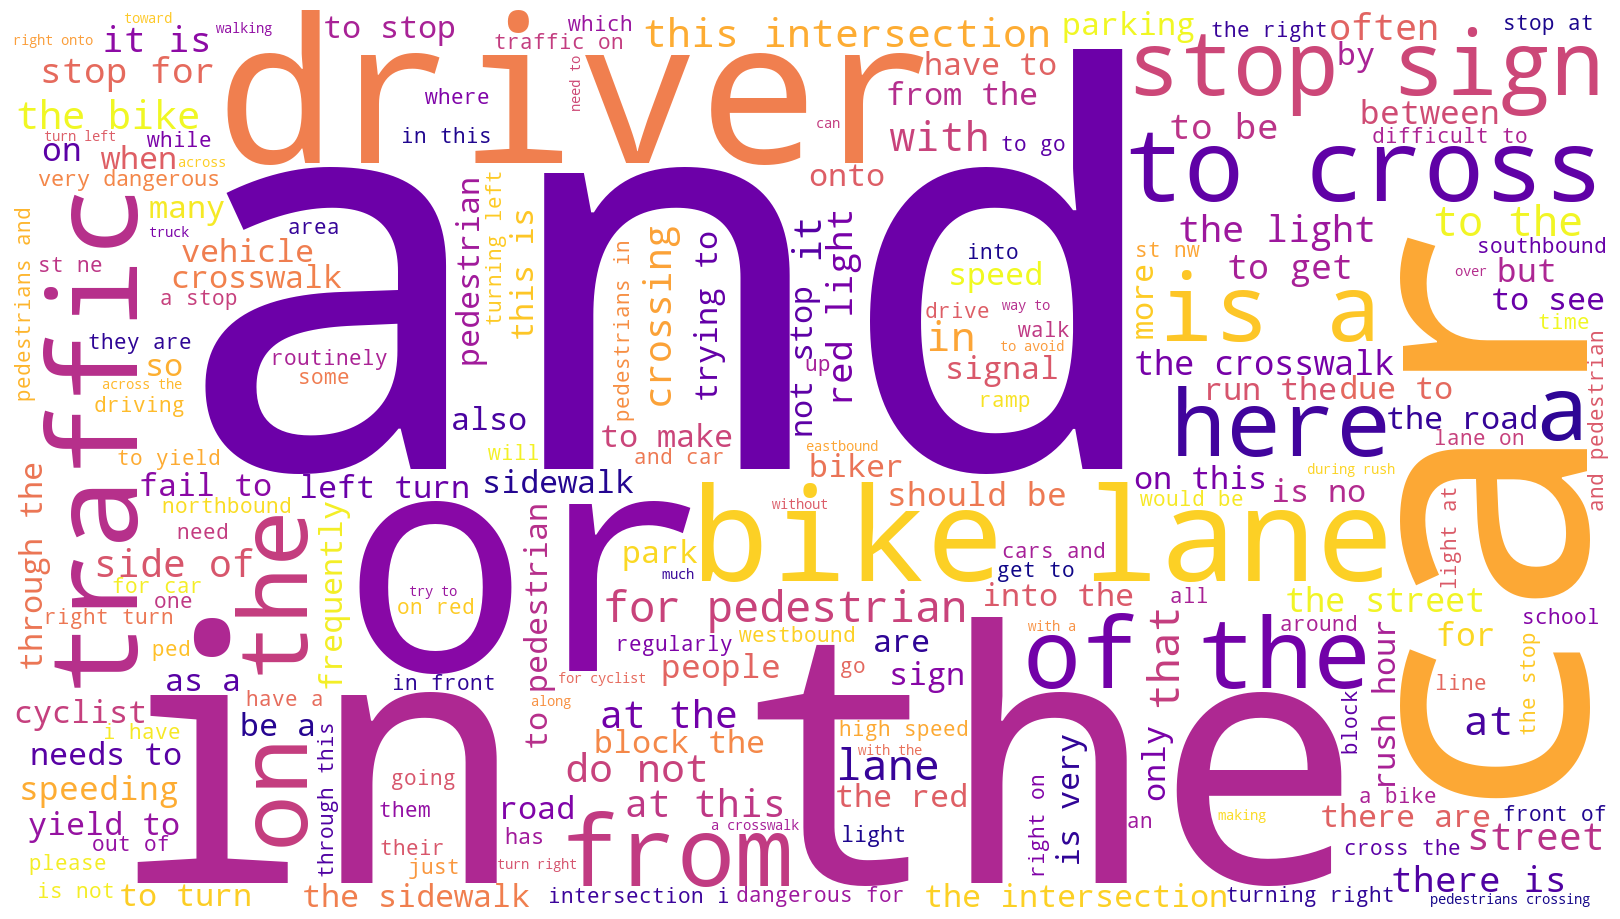

In [13]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly from the one provided.

# 3. Find the most frequently used words with tokenisation

In [14]:
# You should have installed the nltk library previously.
# Otherwise:
# !pip install nltk

In [15]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ciaraw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Tokenisation

In [16]:
# Tokenise the words.
survey['tokens'] = survey['COMMENTS'].apply(word_tokenize)

# Preview data.
survey['tokens'].head()

0    [cars, for, valet, at, the, capital, grille, c...
1                              [illegal, uturns, here]
2    [there, is, no, walk, sign, on, this, intersec...
3    [constant, issue, mpd, never, enforces, despit...
4       [some, cyclists, often, run, this, red, light]
Name: tokens, dtype: object

In [17]:
# Define an empty list of tokens.
all_tokens = []

for i in range(survey.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + survey['tokens'][i]

In [18]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5567, 'to': 4358, 'and': 3122, 'a': 2298, 'on': 2161, 'is': 1999, 'of': 1908, 'cars': 1856, 'this': 1698, 'for': 1517, ...})

In [19]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

### Eliminate stopwords

In [20]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ciaraw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Visualise the tokens of relevance in a word cloud

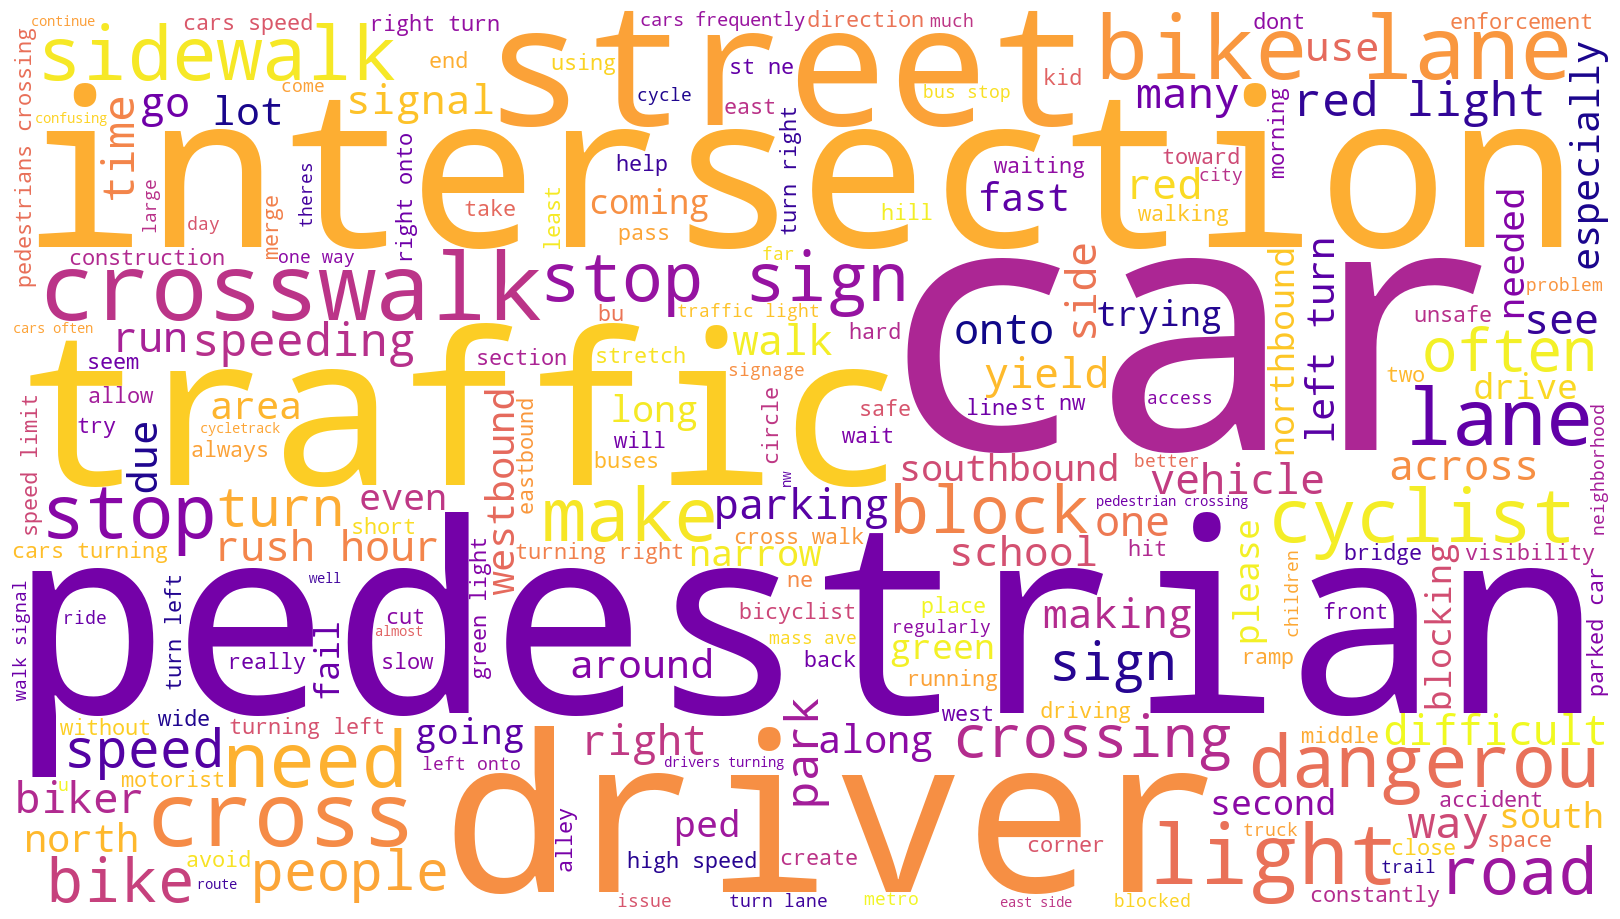

In [21]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

## 4. Count the top 15 words that appear most often

In [22]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'cars': 1856, 'pedestrians': 1143, 'street': 1056, 'drivers': 1009, 'lane': 992, 'stop': 983, 'traffic': 976, 'bike': 817, 'intersection': 810, 'light': 797, ...})

In [23]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
cars,1856
pedestrians,1143
street,1056
drivers,1009
lane,992
stop,983
traffic,976
bike,817
intersection,810


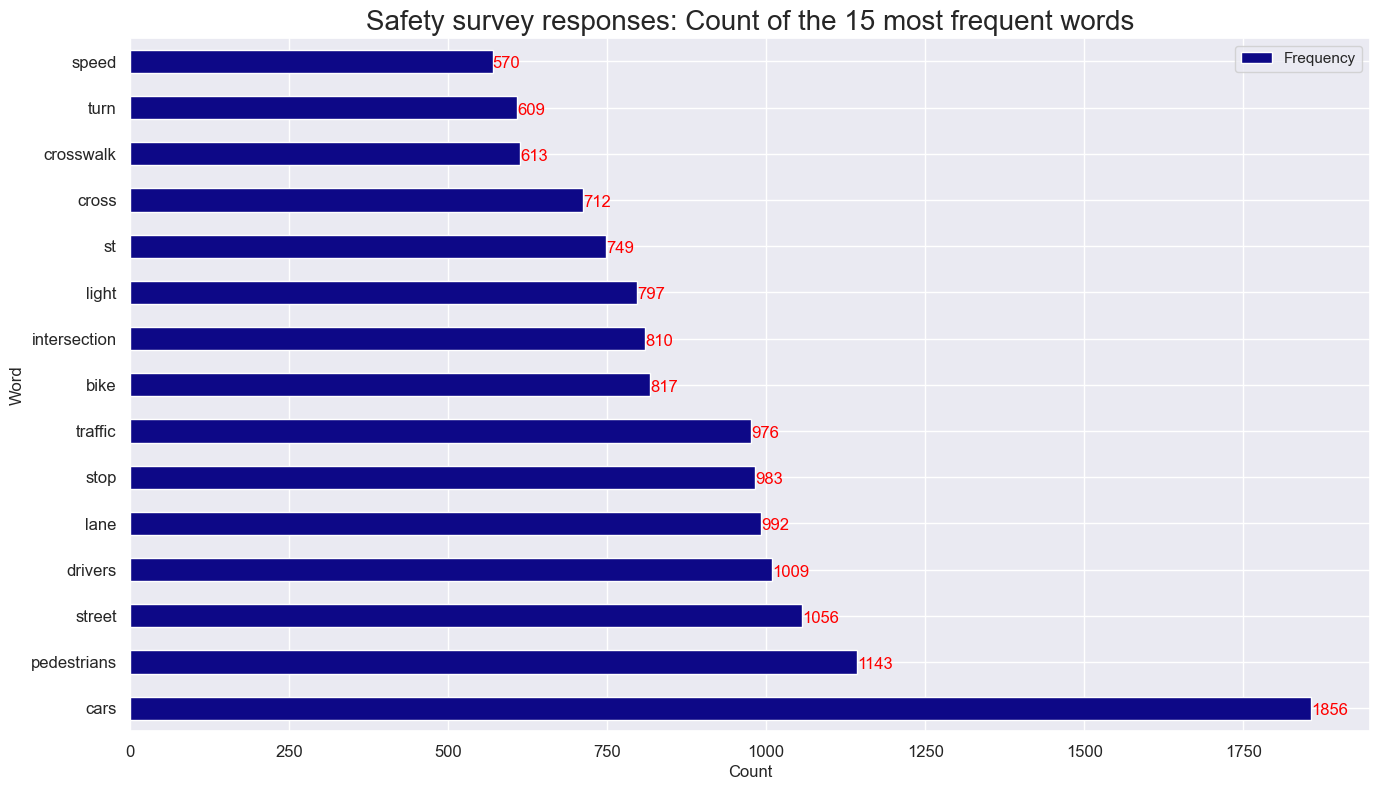

In [24]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

# 

### 5. Extract polarity and subjectivity from survey comments

In [25]:
# Import the necessary package
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
survey['polarity'] = survey['COMMENTS'].apply(generate_polarity)

# Preview the result.
survey['polarity'].head()

0    0.000000
1   -0.500000
2    0.233333
3    0.000000
4    0.200000
Name: polarity, dtype: float64

In [26]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
survey['subjectivity'] = survey['COMMENTS'].apply(generate_subjectivity)

# Preview the result.
survey['subjectivity'].head()

0    0.333333
1    0.500000
2    0.500000
3    0.333333
4    0.350000
Name: subjectivity, dtype: float64

### 6. Visualise sentiment polarity scores on a histogram

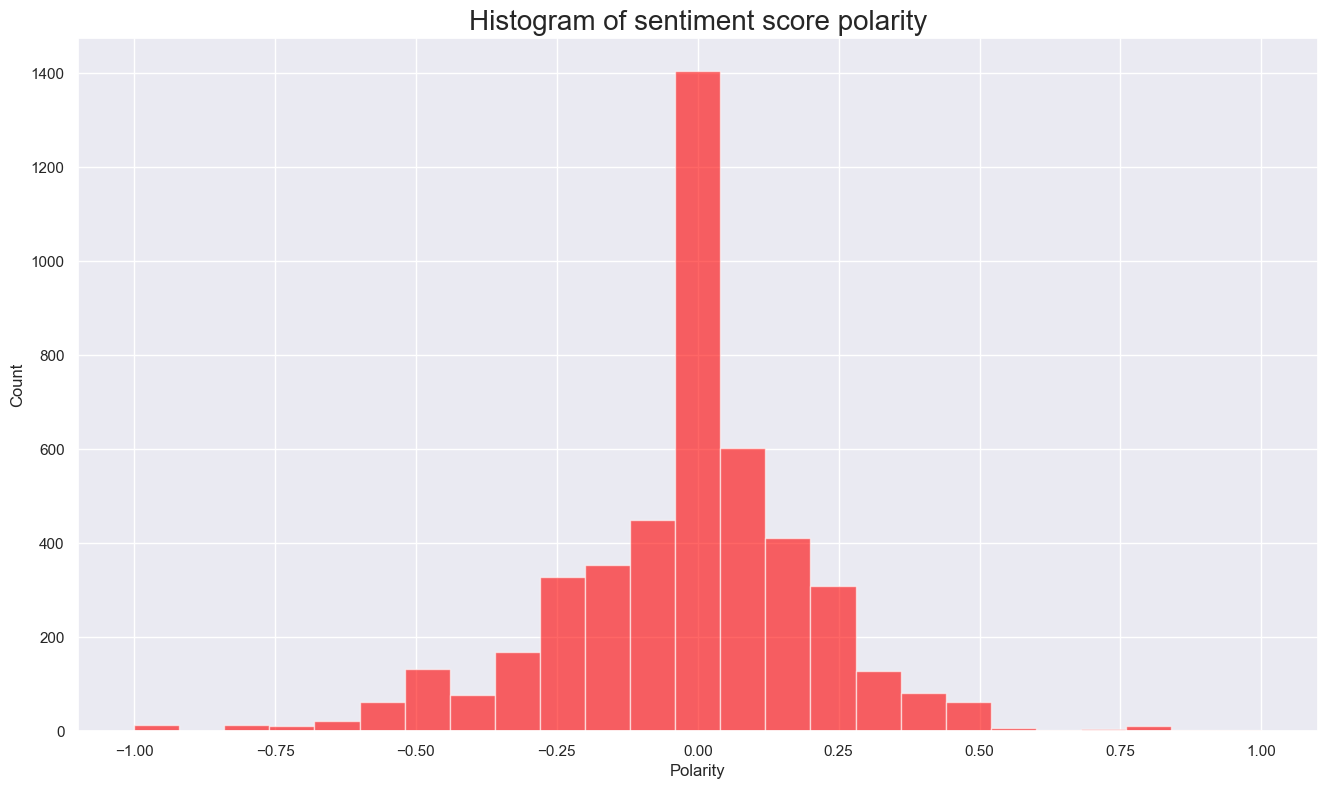

In [27]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(survey['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

In [28]:
TextBlob("the serving staff was fantastic, but the place smelled of vomit").sentiment

Sentiment(polarity=0.4, subjectivity=0.9)

In [29]:
TextBlob("God is real").sentiment

Sentiment(polarity=0.2, subjectivity=0.30000000000000004)

### 7. Extract contextualised comments

In [30]:
# Create a DataFrame.
positive_sentiment = survey.nlargest(10, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['COMMENTS', 'USERTYPE', 'polarity', 'subjectivity', 'STREETSEGID']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['COMMENTS'], **{'width': '1200px'})

,COMMENTS,USERTYPE,polarity,subjectivity,STREETSEGID
2467,this would be an excellent place to divert throughtraffic from 6th avenue on to nj prohibiting cars from traveling southbound with a diverter would create a neighborhood street like 5th this would make room for a southbound separated bike lane,Pedestrian,1.000000,1.000000,4658.000000
2552,legalize eb biking towards ria ne this portion of newton is 1way wb plenty of space for contraflow lane this is best connection to s portion of mt rainier and points e should be accompanied by protected bike lane on ria ne to eastern,Biker,1.000000,0.300000,3644.000000
2276,southbound traffic doesnt get very good visibility of peds coming from dahlia intersection because of the angle of the street and lighttolight driving encourages distraction,Pedestrian,0.910000,0.780000,1813.000000
2850,cars run the stop signs at this intersection traffic calming measures requested raised crosswalks would be ideal which would require motorist to stop,Pedestrian,0.900000,1.000000,9526.000000
3590,too often peds are walking through the bike lane on 15th without recognition that bikes are coming creating a safety issue the nyc look campaign would be ideal for this corridor,Biker,0.900000,1.000000,189.000000
688,would be really great if the bikes lanes on kansas would continue southwest of georgia ave,Biker,0.800000,0.750000,7063.000000
1280,pedestrians in the crosswalk are at great danger here since cars will not stop,Pedestrian,0.800000,0.750000,12927.000000
1946,drivers often fly through this intersection without stopping making it unsafe for everyone,Car Driver,0.800000,0.900000,11743.000000
2188,would be great if there were some way to encourage the cemetery to create pedestrian connections here,Pedestrian,0.800000,0.750000,3705.000000
2424,cycle track on wisconsin would make for a great ns commuting corridor there are plenty of car lanes,Biker,0.800000,0.750000,2593.000000


In [31]:
# Create a DataFrame.
negative_sentiment = survey.nsmallest(10, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['COMMENTS', 'USERTYPE', 'polarity', 'STREETSEGID']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['COMMENTS'], **{'width': '1200px'})


,COMMENTS,USERTYPE,polarity,STREETSEGID
737,cars routinely ignore this stop sign a camera would catch some of the worst violators,Pedestrian,-1.000000,14572.000000
1250,cars speed through here and dont stop for pedestrians in the crosswalk especially bad at rush hour,Pedestrian,-1.000000,4131.000000
1268,this intersection is one of the worst in the city traffic from all angles eckington pl ny ave fl ave are routinely backed up and cause congestion for pedestrians drivers and cyclists at this intersection a traffic study would be helpful,Pedestrian,-1.000000,5256.000000
1506,motorists scream through this stretch which is terrifying if you are crossing the road in the crosswalk,Pedestrian,-1.000000,10095.000000
2207,this is the worst stretch of pennsylvania for cars speeding this is the section that they get to maximum speed,Biker,-1.000000,10736.000000
2491,the road is always in terrible conditions causing people to swerve into oncoming traffic in order to avoid potholes,Car Driver,-1.000000,7812.000000
2526,please please please install allway stop here driver never stop and it is terrifying,Pedestrian,-1.000000,13058.000000
2891,jaywalking terrible in this area,Car Driver,-1.000000,7244.000000
2897,bike lanes in terrible shape please repair,Car Driver,-1.000000,3265.000000
3171,motorcyclists and scooterriders ride in the bike lane they are the worst,Biker,-1.000000,10571.000000


In [32]:
#!pip install spaCy --upgrade

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.



     --------------------------------------- 12.2/12.2 MB 12.6 MB/s eta 0:00:00
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached pathy-0.10.2-py3-none-any.whl (48 kB)
     ---------------------------------------- 96.8/96.8 kB ? eta 0:00:00
     ------------------------------------- 482.8/482.8 kB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.5 MB/s eta 0:00:00
  Using cached wasabi-1.1.2-py3-none-any.whl (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
     ---------------------------------------- 7.0/7.0 MB 15.0 MB/s eta 0:00:00
  Using cached confection-0.1.0-py3-none-any.whl (34 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)


In [33]:
#!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 12.8/12.8 MB 14.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [34]:
#pip install --upgrade click

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 96.6/96.6 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### 8. Identify named entities

In [37]:
# Import the library.
import spacy

# Load the English resource.
nlp = spacy.load('en_core_web_sm')

# Return the text snippet and its corresponding entity label in a list.
def generate_named_entities(comment):
 return [(ent.text.strip(), ent.label_) for ent in nlp(comment).ents]

In [38]:
survey['named_entities'] = survey['COMMENTS'].apply(generate_named_entities)

survey.head()

,index,X,Y,OBJECTID,GLOBALID,REQUESTID,USERTYPE,REQUESTTYPE,REQUESTDATE,STATUS,STREETSEGID,COMMENTS,tokens,polarity,subjectivity,named_entities
0,0,-77.020315,38.892890,1,{7AA2347A-C035-4D5A-9196-07C309B4C7BF},1,Pedestrian,Blocking the crosswalk,2015/06/29 19:56:00+00,Unassigned,10022.0,cars for valet at the capital grille constantl...,"[cars, for, valet, at, the, capital, grille, c...",0.000000,0.333333,[]
1,1,-77.020877,38.893046,2,{1AFF4069-5D94-49A1-9D1F-0A089D414F5F},2,Pedestrian,Other Driving Issue,2015/06/29 19:57:36+00,Unassigned,10022.0,illegal uturns here,"[illegal, uturns, here]",-0.500000,0.500000,[]
2,2,-77.024643,38.918125,3,{908CCF07-A389-40EE-B5D2-7ADAF90404D1},3,Pedestrian,Not enough time to cross,2015/06/29 20:14:32+00,Unassigned,10396.0,there is no walk sign on this intersection so ...,"[there, is, no, walk, sign, on, this, intersec...",0.233333,0.500000,"[(vermont avenue, FAC)]"
3,3,-77.003515,38.896124,4,{12E7A594-76F9-41CE-91AC-9B6B8E08EC5C},4,Pedestrian,Stop sign running,2015/06/29 20:15:02+00,Unassigned,4381.0,constant issue mpd never enforces despite repe...,"[constant, issue, mpd, never, enforces, despit...",0.000000,0.333333,[]
4,4,-77.017562,38.883266,5,{0AED48A8-A4DD-44E9-8C4A-D45E14E7462D},5,Biker,Cyclist behavior,2015/06/29 20:15:05+00,Unassigned,5344.0,some cyclists often run this red light,"[some, cyclists, often, run, this, red, light]",0.200000,0.350000,[]


### 9. Visualise named entities

In [39]:
from spacy import displacy

# Iterate through a selection of comments.
for i in range(750,1750):
    # Check whether the corresponding comment has a named entity.
    if survey['named_entities'][i]:
        # Highlight the entity in the comment.
        displacy.render(nlp(survey['COMMENTS'][i]), style='ent', jupyter=True)

### 10. Generate a document-term matrix

In [40]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(survey['COMMENTS'])


In [42]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names_out()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words. 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

           Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
red            0      0      0      0      1      0      0      0      1   
bike           0      0      0      0      0      0      1      1      0   
traffic        0      0      0      0      0      0      0      0      1   
st             0      0      0      0      0      0      1      0      1   
block          1      0      0      0      0      0      1      0      0   
crosswalk      1      0      0      0      0      0      0      0      1   
right          0      0      0      0      0      0      0      0      0   
signal         0      0      0      0      0      0      0      0      2   
light          0      0      1      0      1      0      0      0      0   
turn           0      0      1      0      0      0      0      0      0   

           Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
red             1       1       1       0       0       0  
bike            1       0       0       0  

<Axes: >

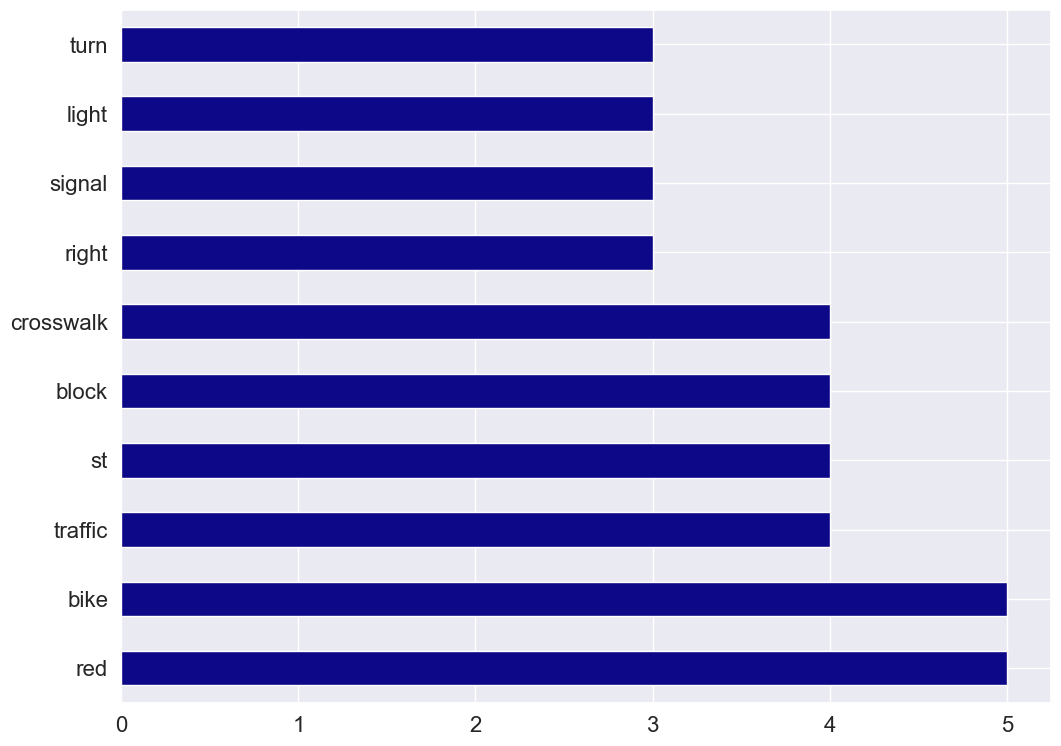

In [43]:
document_term_matrix['total_count'].plot.barh(figsize=(12, 9),
                                              fontsize=16,
                                              colormap ='plasma')

## Conclusion(s)

> Write your own conclusions here.